In [ ]:
from collections import defaultdict, deque

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_edge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)  # For an undirected graph

    def bfs(self, start):
        visited = set()
        queue = deque([start])

        while queue:
            vertex = queue.popleft()
            if vertex not in visited:
                print(vertex, end=' ')
                visited.add(vertex)
                queue.extend(neighbour for neighbour in self.graph[vertex] if neighbour not in visited)

if __name__ == "__main__":
    # Create a sample graph
    g = Graph()
    g.add_edge(0, 1)
    g.add_edge(0, 2)
    g.add_edge(1, 2)
    g.add_edge(2, 0)
    g.add_edge(2, 3)
    g.add_edge(3, 3)

    print("BFS starting from vertex 0:")
    g.bfs(0)


BFS starting from vertex 0:
0 1 2 3 

In [ ]:
from collections import defaultdict

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_edge(self, u, v):
        self.graph[u].append(v)

    def dfs_util(self, v, visited):
        visited[v] = True
        print(v, end=' ')

        for neighbour in self.graph[v]:
            if not visited[neighbour]:
                self.dfs_util(neighbour, visited)

    def dfs(self, start_node):
        visited = [False] * (max(self.graph) + 1)
        self.dfs_util(start_node, visited)

# Example usage:
g = Graph()
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(1, 2)
g.add_edge(2, 0)
g.add_edge(2, 3)
g.add_edge(3, 3)

print("DFS starting from vertex 0:")
g.dfs(0)


DFS starting from vertex 0:
0 1 2 3 

In [ ]:
class Rule:
    def __init__(self, premise, conclusion):
        self.premise = premise
        self.conclusion = conclusion

class KnowledgeBase:
    def __init__(self):
        self.rules = []

    def add_rule(self, premise, conclusion):
        rule = Rule(premise, conclusion)
        self.rules.append(rule)

    def forward_chaining(self, facts):
        while True:
            new_facts = set()
            for rule in self.rules:
                if set(rule.premise).issubset(facts) and rule.conclusion not in facts:
                    print(f"Applying forward chaining: {rule.premise} -> {rule.conclusion}")
                    new_facts.add(rule.conclusion)

            if not new_facts:
                break

            facts.update(new_facts)

        return facts

    def backward_chaining(self, goal, facts):
        if goal in facts:
            print(f"{goal} is already known.")
            return True
        else:
            for rule in self.rules:
                if goal == rule.conclusion:
                    print(f"Trying to prove {goal} using {rule.premise} -> {rule.conclusion}")
                    if all(self.backward_chaining(p, facts) for p in rule.premise):
                        print(f"Proved {goal}")
                        facts.add(goal)
                        return True

            print(f"Unable to prove {goal}")
            return False

# Example usage:
if __name__ == "__main__":
    kb = KnowledgeBase()

    # Define rules
    kb.add_rule(['A'], 'B')
    kb.add_rule(['B'], 'C')
    kb.add_rule(['C'], 'D')

    # Forward chaining example
    initial_facts = {'A'}
    result_forward_chaining = kb.forward_chaining(initial_facts)
    print(f"Forward chaining result: {result_forward_chaining}")

    # Backward chaining example
    goal_backward_chaining = 'D'
    result_backward_chaining = kb.backward_chaining(goal_backward_chaining, initial_facts)
    print(f"Backward chaining result for goal {goal_backward_chaining}: {result_backward_chaining}")


Applying forward chaining: ['A'] -> B
Applying forward chaining: ['B'] -> C
Applying forward chaining: ['C'] -> D
Forward chaining result: {'B', 'C', 'D', 'A'}
D is already known.
Backward chaining result for goal D: True


In [ ]:
class UnificationError(Exception):
    pass

def unify_var(var, x, theta):
    if var in theta:
        return unify(theta[var], x, theta)
    elif x in theta:
        return unify(var, theta[x], theta)
    else:
        theta[var] = x
        return theta

def unify(x, y, theta={}):
    if theta is None:
        return None
    elif x == y:
        return theta
    elif isinstance(x, str) and x.islower():
        return unify_var(x, y, theta)
    elif isinstance(y, str) and y.islower():
        return unify_var(y, x, theta)
    elif isinstance(x, list) and isinstance(y, list) and len(x) == len(y):
        return unify(x[1:], y[1:], unify(x[0], y[0], theta))
    else:
        raise UnificationError(f"Unification failed for ({x}, {y})")

# Example usage:
if __name__ == "__main__":
    # Example 1
    try:
        theta = unify('x', 'y')
        print(f"Unification successful. Substitution: {theta}")
    except UnificationError as e:
        print(f"Unification failed: {e}")


Unification successful. Substitution: {'x': 'y'}


In [ ]:
import numpy as np

def perform_array_operations(arr1, arr2):
    # Basic operations
    print("Array 1:")
    print(arr1)
    print("Array 2:")
    print(arr2)

    # Addition
    print("Addition:")
    print(arr1 + arr2)

    # Subtraction
    print("Subtraction:")
    print(arr1 - arr2)

    # Multiplication (element-wise)
    print("Multiplication (element-wise):")
    print(arr1 * arr2)

    # Division (element-wise)
    print("Division (element-wise):")
    print(arr1 / arr2)

    # Dot product
    print("Dot Product:")
    print(np.dot(arr1, arr2.T))  # Transpose of arr2 for proper multiplication

    # Matrix multiplication
    print("Matrix Multiplication:")
    print(np.matmul(arr1, arr2.T))  # Transpose of arr2 for proper multiplication

    # Sum along axis
    print("Sum along axis 0:")
    print(np.sum(arr1, axis=0))
    print("Sum along axis 1:")
    print(np.sum(arr1, axis=1))

    # Min and Max
    print("Minimum:")
    print(np.min(arr1))
    print("Maximum:")
    print(np.max(arr1))

    # Mean and Standard Deviation
    print("Mean:")
    print(np.mean(arr1))
    print("Standard Deviation:")
    print(np.std(arr1))

    # Reshaping arrays
    print("Reshaped Array:")
    print(np.reshape(arr1, (3, 2)))

    # Transpose
    print("Transposed Array:")
    print(np.transpose(arr1))

# Example usage:
if __name__ == "__main__":
    # Creating NumPy arrays
    arr1 = np.array([[1, 2, 3], [4, 5, 6]])
    arr2 = np.array([[7, 8, 9], [10, 11, 12]])

    # Calling the function
    perform_array_operations(arr1, arr2)


Array 1:
[[1 2 3]
 [4 5 6]]
Array 2:
[[ 7  8  9]
 [10 11 12]]
Addition:
[[ 8 10 12]
 [14 16 18]]
Subtraction:
[[-6 -6 -6]
 [-6 -6 -6]]
Multiplication (element-wise):
[[ 7 16 27]
 [40 55 72]]
Division (element-wise):
[[0.14285714 0.25       0.33333333]
 [0.4        0.45454545 0.5       ]]
Dot Product:
[[ 50  68]
 [122 167]]
Matrix Multiplication:
[[ 50  68]
 [122 167]]
Sum along axis 0:
[5 7 9]
Sum along axis 1:
[ 6 15]
Minimum:
1
Maximum:
6
Mean:
3.5
Standard Deviation:
1.707825127659933
Reshaped Array:
[[1 2]
 [3 4]
 [5 6]]
Transposed Array:
[[1 4]
 [2 5]
 [3 6]]


In [ ]:

import numpy as np
# Creating NumPy arrays
arr1 = np.array([1, 2, 3, 4, 5])
arr2 = np.arange(1, 6)
zeros_arr = np.zeros((3, 3))
ones_arr = np.ones((2, 4))
linspace_arr = np.linspace(0, 10, 5)

# Array Attributes
print("Shape of arr1:", arr1.shape)
print("Size of arr2:", arr2.size)
print("Data type of linspace_arr:", linspace_arr.dtype)

# Array Indexing and Slicing
print("Third element of arr1:", arr1[2])
print("Slice of arr2:", arr2[1:4])

# Array Operations
result = arr1 + arr2
print("Result of element-wise addition:", result)

# Mathematical Functions
print("Sin values of arr1:", np.sin(arr1))

# Aggregation Functions
print("Sum of arr2:", np.sum(arr2))
print("Mean of zeros_arr:", np.mean(zeros_arr))

# Reshaping Arrays
reshaped_arr = arr1.reshape((5, 1))
print("Reshaped arr1:", reshaped_arr)

# Array Concatenation and Splitting
concatenated_arr = np.concatenate((arr1, arr2))
print("Concatenated array:", concatenated_arr)

# Random Number Generation
random_arr = np.random.rand(3, 3)
print("Random array:", random_arr)


Shape of arr1: (5,)
Size of arr2: 5
Data type of linspace_arr: float64
Third element of arr1: 3
Slice of arr2: [2 3 4]
Result of element-wise addition: [ 2  4  6  8 10]
Sin values of arr1: [ 0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427]
Sum of arr2: 15
Mean of zeros_arr: 0.0
Reshaped arr1: [[1]
 [2]
 [3]
 [4]
 [5]]
Concatenated array: [1 2 3 4 5 1 2 3 4 5]
Random array: [[0.30488693 0.27455414 0.86755421]
 [0.41252374 0.97164258 0.70820022]
 [0.01517572 0.06809581 0.16909913]]


In [ ]:
import numpy as np
# Basic Indexing and Slicing
print("Basic Indexing and Slicing")
arr = np.arange(1, 11)  # Create an array from 1 to 10
print("Original array:", arr)
print("Element at index 5:", arr[5])
print("Elements from index 3 to 7:", arr[3:8])
print("Elements up to index 5:", arr[:5])

# Multi-dimensional arrays
print("\nMulti-dimensional Array Indexing")
arr_2d = np.array([[10, 20, 30], [40, 50, 60], [70, 80, 90]])  # 3x3 array
print("Original 2D array:\n", arr_2d)
print("Access a single element (row=0, col=2):", arr_2d[0, 2])
print("2D Array Slicing, access the first two rows:\n", arr_2d[:2])
print("2D Array Slicing, rows and columns (row=0,1 & col=1,2):\n", arr_2d[:2, 1:])

# Boolean Indexing
print("\nBoolean Indexing")
arr = np.arange(1, 11)
bool_arr = arr>5  # Boolean array
print("Boolean array:", bool_arr)
print("Select elements greater than 5:", arr[bool_arr])
# or directly
print("Directly select elements greater than 5:", arr[arr> 5])

# Fancy Indexing
print("\nFancy Indexing")
arr = np.arange(1, 11)
print("Original array:", arr)
print("Elements at indices 2, 4, and 6:", arr[[2, 4, 6]])

# Advanced Slicing of Multi-dimensional Arrays
print("\nAdvanced Slicing of Multi-dimensional Arrays")
arr_2d = np.array([[10, 20, 30], [40, 50, 60], [70, 80, 90]])
print("Original 2D array:\n", arr_2d)
print("Select the first and last row:\n", arr_2d[[0, -1]])
print("Select the middle column:\n", arr_2d[:, [1]])

# Modifying Elements with Fancy Indexing
print("\nModifying Elements with Fancy Indexing")
arr = np.arange(10)
arr[[2, 4, 6]] = 100  # Set elements at indices 2, 4, and 6 to 100
print("Modified array:", arr)


Basic Indexing and Slicing
Original array: [ 1  2  3  4  5  6  7  8  9 10]
Element at index 5: 6
Elements from index 3 to 7: [4 5 6 7 8]
Elements up to index 5: [1 2 3 4 5]

Multi-dimensional Array Indexing
Original 2D array:
 [[10 20 30]
 [40 50 60]
 [70 80 90]]
Access a single element (row=0, col=2): 30
2D Array Slicing, access the first two rows:
 [[10 20 30]
 [40 50 60]]
2D Array Slicing, rows and columns (row=0,1 & col=1,2):
 [[20 30]
 [50 60]]

Boolean Indexing
Boolean array: [False False False False False  True  True  True  True  True]
Select elements greater than 5: [ 6  7  8  9 10]
Directly select elements greater than 5: [ 6  7  8  9 10]

Fancy Indexing
Original array: [ 1  2  3  4  5  6  7  8  9 10]
Elements at indices 2, 4, and 6: [3 5 7]

Advanced Slicing of Multi-dimensional Arrays
Original 2D array:
 [[10 20 30]
 [40 50 60]
 [70 80 90]]
Select the first and last row:
 [[10 20 30]
 [70 80 90]]
Select the middle column:
 [[20]
 [50]
 [80]]

Modifying Elements with Fancy In

In [ ]:
 # Create a 4x3 matrix with values ranging from 2 to 13.
matrix = np.arange(2, 14).reshape(4, 3)
print("(i) 4x3 Matrix:")
print(matrix)

# Replace the odd numbers by -1 in the following array.
array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
array[array % 2 != 0] = -1
print("(ii) Array with odd numbers replaced by -1:")
print(array)

# Perform operations on an array of mobile phones prices.
mobile_prices = np.array([6999, 7500, 11999, 27899, 14999, 9999])

# Create a 1d-array of mobile phones prices
print("(iii) a) 1d-array of mobile phone prices:")
print(mobile_prices)

# Convert this array to float type
mobile_prices_float = mobile_prices.astype(float)
print("(iii) b) Converted array to float type:")
print(mobile_prices_float)

# Append a new mobile having price of 13999 Rs. to this array
new_mobile_price = 13999
mobile_prices = np.append(mobile_prices, new_mobile_price)
print("(iii) c) Array with new mobile added:")
print(mobile_prices)



(i) 4x3 Matrix:
[[ 2  3  4]
 [ 5  6  7]
 [ 8  9 10]
 [11 12 13]]
(ii) Array with odd numbers replaced by -1:
[-1  2 -1  4 -1  6 -1  8 -1 10]
(iii) a) 1d-array of mobile phone prices:
[ 6999  7500 11999 27899 14999  9999]
(iii) b) Converted array to float type:
[ 6999.  7500. 11999. 27899. 14999.  9999.]
(iii) c) Array with new mobile added:
[ 6999  7500 11999 27899 14999  9999 13999]


Mean Squared Error: 0.08347044574439423
R-squared Value: -0.0011615606677461976


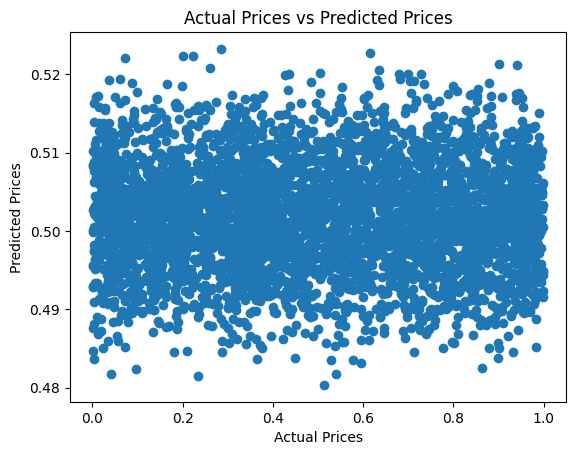

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.datasets import fetch_california_housing  # Commented out to avoid fetching error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dummy Data
np.random.seed(42)
data = pd.DataFrame(np.random.rand(20640, 8), columns=["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"])
data['PRICE'] = np.random.rand(20640)

X = data.drop('PRICE', axis=1)
y = data['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Value: {r2}')

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()


In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
np.random.seed(42)
data_size = 1000
X_numerical = np.random.rand(data_size, 3)
X_text = ["positive" if np.random.rand() > 0.5 else "negative" for _ in range(data_size)]
y = np.random.randint(2, size=data_size)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_text)
X_text_sequences = tokenizer.texts_to_sequences(X_text)
X_text_padded = pad_sequences(X_text_sequences)
X_text_encoded = to_categorical(X_text_padded)
X_combined = np.hstack((X_numerical, X_text_encoded))
X_train, X_temp, y_train, y_temp = train_test_split(X_combined, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_combined.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
predictions = model.predict(X_test)
binary_predictions = [1 if pred >= 0.5 else 0 for pred in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
mse = mean_squared_error(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(f"Mean Squared Error: {mse}")


Epoch 1/10
22/22 [==============================] - 2s 20ms/step - loss: 0.6943 - accuracy: 0.5086 - val_loss: 0.6905 - val_accuracy: 0.5333
Epoch 2/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6897 - accuracy: 0.5314 - val_loss: 0.6897 - val_accuracy: 0.5267
Epoch 3/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.5314 - val_loss: 0.6893 - val_accuracy: 0.5267
Epoch 4/10
22/22 [==============================] - 0s 6ms/step - loss: 0.6890 - accuracy: 0.5400 - val_loss: 0.6891 - val_accuracy: 0.5133
Epoch 5/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6880 - accuracy: 0.5286 - val_loss: 0.6886 - val_accuracy: 0.5267
Epoch 6/10
22/22 [==============================] - 0s 6ms/step - loss: 0.6881 - accuracy: 0.5343 - val_loss: 0.6906 - val_accuracy: 0.5267
Epoch 7/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6867 - accuracy: 0.5343 - val_loss: 0.6879 - val_accuracy: 0.5067
Epoch 8/10
22/22 [=